# Austrailan Open 2019 Final Analysis

Score: [1] Djokovic def. [2] Nadal 6-3 6-2 6-3   
Time of Match: 2 hours y 4 minutes

### Motivation

I am A loyal 8-year Rafael Nadal fan. I have always been intersetd to understand the statistics of Nadal matches. The goal of this analysis is to understand the different factors led to the supperising result of the match where Nadal lost to Djokovic in straight 3 sets.

In [58]:
# packages importing
import numpy as np                
import pandas as pd
import altair as alt
alt.renderers.enable('mimetype');

## Data Exploration

In [2]:
events =  pd.read_csv('Data/events.csv', index_col = 0)
events.head()

,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time
0,1,70877,1,Djokovic,Nadal,True,first,serve,forehand,6.50,-0.24,1.03,27.44,0.00
1,1,70900,2,Nadal,Djokovic,False,first,slice,backhand,0.05,25.59,6.17,1.11,0.92
2,1,70950,3,Djokovic,Nadal,False,first,topspin,forehand,1.42,2.33,4.75,26.45,2.92
3,2,71488,1,Djokovic,Nadal,True,first,serve,forehand,4.48,-0.01,7.90,26.83,24.44
4,3,71796,1,Djokovic,Nadal,True,second,serve,forehand,4.48,-0.37,7.88,26.47,36.76


The events dataframe contains information about each point hit.

In [3]:
events.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 864
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rallyid     865 non-null    int64  
 1   frameid     865 non-null    int64  
 2   strokeid    865 non-null    int64  
 3   hitter      865 non-null    object 
 4   receiver    845 non-null    object 
 5   isserve     865 non-null    bool   
 6   serve       865 non-null    object 
 7   type        865 non-null    object 
 8   stroke      865 non-null    object 
 9   hitter_x    865 non-null    float64
 10  hitter_y    865 non-null    float64
 11  receiver_x  845 non-null    float64
 12  receiver_y  845 non-null    float64
 13  time        865 non-null    float64
dtypes: bool(1), float64(5), int64(3), object(5)
memory usage: 95.5+ KB


In [4]:
events.describe()

,rallyid,frameid,strokeid,hitter_x,hitter_y,receiver_x,receiver_y,time
count,865.000000,865.000000,865.000000,865.000000,865.000000,845.000000,845.000000,865.000000
mean,104.494798,163773.654335,4.708671,4.789121,12.118277,4.758746,12.695479,3715.866173
std,58.939649,54779.332792,3.937678,2.569683,12.670941,2.307859,13.093199,2191.173312
min,1.000000,70877.000000,1.000000,-2.190000,-3.040000,-1.700000,-3.570000,0.000000
25%,54.000000,116235.000000,2.000000,2.900000,-0.390000,3.120000,-0.840000,1814.320000
50%,108.000000,164616.000000,3.000000,4.880000,6.540000,4.810000,17.520000,3749.560000
75%,155.000000,210254.000000,7.000000,6.640000,25.140000,6.280000,25.840000,5575.080000
max,206.000000,256892.000000,22.000000,11.360000,30.370000,10.080000,30.930000,7440.600000


In [5]:
events.isnull().sum()

rallyid        0
frameid        0
strokeid       0
hitter         0
receiver      20
isserve        0
serve          0
type           0
stroke         0
hitter_x       0
hitter_y       0
receiver_x    20
receiver_y    20
time           0
dtype: int64

We have 20 reciever observations that are not available.

In [6]:
points =  pd.read_csv('Data/points.csv', index_col = 0)

In [7]:
points.head()

,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96,"0:0, 15:0"
2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39,"0:0, 30:0"
4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18,"0:0, 40:0"
5,6,Djokovic,Nadal,Djokovic,net,first,10,10.40,6.41,12.78,"1:0, 0:0"
7,8,Nadal,Djokovic,Djokovic,out,second,7,7.20,0.50,18.67,"1:0, 15:0"


In [8]:
points.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 0 to 205
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rallyid    142 non-null    int64  
 1   server     142 non-null    object 
 2   returner   139 non-null    object 
 3   winner     142 non-null    object 
 4   reason     142 non-null    object 
 5   serve      142 non-null    object 
 6   strokes    142 non-null    int64  
 7   totaltime  142 non-null    float64
 8   x          142 non-null    float64
 9   y          142 non-null    float64
 10  score      142 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 13.3+ KB


In [9]:
points.describe()

,rallyid,strokes,totaltime,x,y
count,142.000000,142.000000,142.000000,142.000000,142.000000
mean,103.683099,5.485915,4.207887,4.755563,13.597676
std,59.790932,4.338081,4.653339,3.061096,8.715196
min,1.000000,1.000000,-0.520000,-2.110000,-3.570000
25%,51.750000,2.000000,0.800000,1.842500,6.677500
50%,103.500000,4.000000,2.300000,4.760000,12.890000
75%,156.750000,7.000000,6.860000,7.545000,21.525000
max,206.000000,22.000000,21.400000,11.290000,30.230000


In [10]:
points.isnull().sum()

rallyid      0
server       0
returner     3
winner       0
reason       0
serve        0
strokes      0
totaltime    0
x            0
y            0
score        0
dtype: int64

3 missing observations.

In [11]:
rallies =  pd.read_csv('Data/rallies.csv', index_col = 0)

In [12]:
rallies.head()

,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y
0,1,Djokovic,Nadal,Djokovic,winner,first,3,0.92,1.92,21.96
1,2,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,7.42,12.10
2,3,Djokovic,Nadal,Djokovic,out,second,4,4.16,3.33,-0.39
3,4,Djokovic,Nadal,__undefined__,second_serve,first,1,0.00,4.64,17.69
4,5,Djokovic,Nadal,Djokovic,ace,second,2,0.40,1.62,17.18


In [13]:
rallies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206 entries, 0 to 205
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   rallyid    206 non-null    int64  
 1   server     206 non-null    object 
 2   returner   200 non-null    object 
 3   winner     206 non-null    object 
 4   reason     206 non-null    object 
 5   serve      206 non-null    object 
 6   strokes    206 non-null    int64  
 7   totaltime  206 non-null    float64
 8   x          206 non-null    float64
 9   y          206 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 17.7+ KB


In [14]:
rallies.describe()

,rallyid,strokes,totaltime,x,y
count,206.000000,206.000000,206.000000,206.000000,206.000000
mean,103.500000,4.199029,2.964078,4.810194,13.326796
std,59.611241,4.218912,4.338453,2.857060,7.636197
min,1.000000,1.000000,-0.520000,-2.110000,-3.570000
25%,52.250000,1.000000,0.000000,2.312500,7.922500
50%,103.500000,2.000000,0.840000,4.805000,12.930000
75%,154.750000,6.000000,3.970000,7.277500,18.265000
max,206.000000,22.000000,21.400000,11.290000,30.230000


In [15]:
rallies.isnull().sum()

rallyid      0
server       0
returner     6
winner       0
reason       0
serve        0
strokes      0
totaltime    0
x            0
y            0
dtype: int64

6 missing observations.

In [16]:
serves =  pd.read_csv('Data/serves.csv', index_col = 0)

In [17]:
serves.head()

,rallyid,server,x,y
0,1,Djokovic,1.86,16.80
1,3,Djokovic,7.05,16.97
2,6,Djokovic,8.04,17.80
3,8,Nadal,4.44,16.24
4,9,Nadal,5.71,16.40


In [18]:
serves.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 132
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   rallyid  133 non-null    int64  
 1   server   133 non-null    object 
 2   x        133 non-null    float64
 3   y        133 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.2+ KB


In [19]:
serves.describe()

,rallyid,x,y
count,133.000000,133.00000,133.000000
mean,104.172932,4.75188,12.433233
std,59.851143,2.32375,4.773501
min,1.000000,0.86000,4.260000
25%,54.000000,2.89000,7.050000
50%,103.000000,4.82000,15.880000
75%,157.000000,6.49000,16.640000
max,206.000000,8.69000,17.890000


In [20]:
serves.isnull().sum()

rallyid    0
server     0
x          0
y          0
dtype: int64

## Basic Analysis

* Total points won

In [22]:
points[['winner', 'rallyid']].groupby('winner').count()

,rallyid
winner,
Djokovic,89
Nadal,53


### Total points won for each point type

In [23]:
grouped_points = points[['winner', 'reason', 'rallyid']].groupby(by = ['winner', 'reason']).count().reset_index().rename(
    columns = {'rallyid' : 'count'})


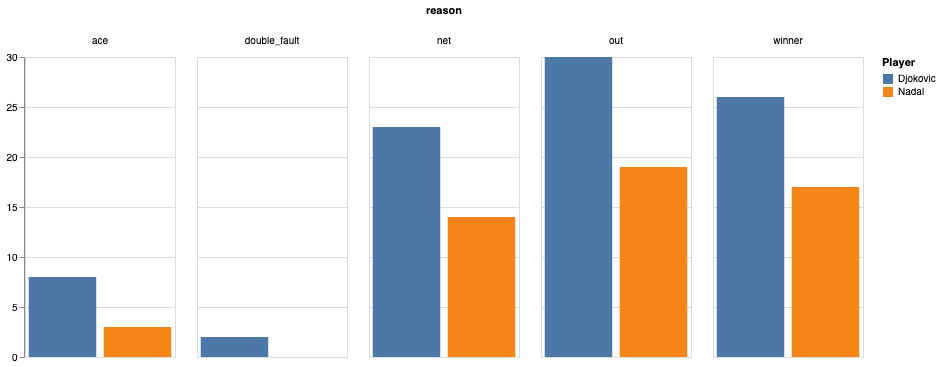

In [59]:
alt.Chart(grouped_points).mark_bar().encode(
    x = alt.X('winner:O', axis = None),
    y = alt.Y('count:Q', title = None),
    color = alt.Color('winner:N',title = 'Player' ),
    column = 'reason:N',
    tooltip=['count']
).properties(width = 150)

* Points won for first vs second serves for both players.

In [25]:
points_serves = points[['winner', 'serve']].groupby(by = ['winner', 'serve']).size().reset_index(name='counts')
points_serves

,winner,serve,counts
0,Djokovic,first,62
1,Djokovic,second,27
2,Nadal,first,36
3,Nadal,second,17


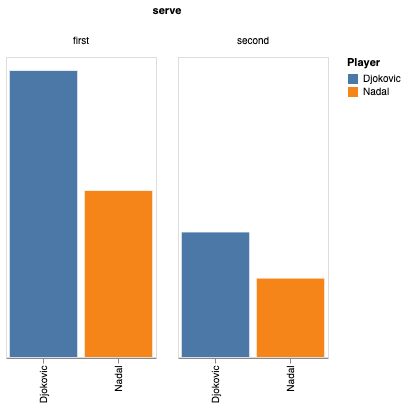

In [60]:
alt.Chart(points_serves).mark_bar().encode(
    x = alt.X('winner:O', title = None),
    y = alt.Y('counts:Q', axis = None),
    color = alt.Color('winner:N',title = 'Player' ),
    column = 'serve:N'
).properties(width = 150)

#### What about who was better during long rallies?


From analyzing the points dataframe I can see that for some observations the number is incorrect, because for points with winner as a reason, the minimum number of stokes should be 2.

In [27]:
points.query("reason == 'winner' and strokes < 2")

,rallyid,server,returner,winner,reason,serve,strokes,totaltime,x,y,score
70,71,Nadal,Djokovic,Nadal,winner,first,1,0.0,4.84,29.68,"6:3 0:0, 30:40"
93,94,Djokovic,Nadal,Djokovic,winner,first,1,0.0,5.46,-1.77,"6:3 2:2, 0:0"


Those observations will be updated by incrementing the number of strokes by 1.

In [28]:
points.loc[70, 'strokes'] = 2
points.loc[93, 'strokes'] = 2

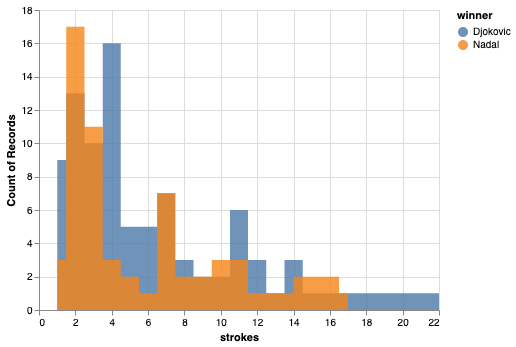

In [61]:
alt.Chart(points[['winner', 'strokes']]).mark_bar().mark_area(
    opacity=0.8,
    interpolate='step'
).encode(
    alt.X('strokes'),
    alt.Y('count()', stack=None),
    color = "winner:N"
        )

#### Points won by both players 

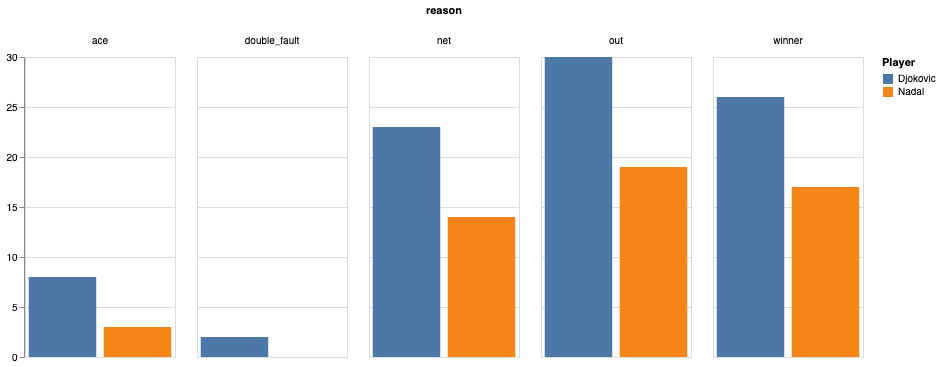

In [62]:
alt.Chart(grouped_points).mark_bar().encode(
    x = alt.X('winner:O', axis = None),
    y = alt.Y('count:Q', title = None),
    color = alt.Color('winner:N',title = 'Player' ),
    column = 'reason:N',
    tooltip=['count']
).properties(width = 150)

### Building the court

In [31]:
data = [[0, 0, 1], [0, 10.97, 2], [23.78, 10.97, 3], [23.78, 0, 4], [0,0, 5]]
out_lines = pd.DataFrame(data, columns = ['x', 'y', 'order'])


data = [[5.5, 1.37, 1], [5.5, 9.6, 2], [5.5, 5.5, 3], [18.385 ,5.5, 4], [18.385, 1.37, 5], [18.385, 9.6, 6]]
t_lines = pd.DataFrame(data, columns = ['x', 'y', 'order'])

    
data = [[23.78, 1.37, 1], [0, 1.37, 2]]
lower_lines = pd.DataFrame(data, columns = ['x', 'y', 'order'])

data = [[23.78, 9.6, 1], [0, 9.6, 2]]
upper_lines = pd.DataFrame(data, columns = ['x', 'y', 'order'])

data = [[11.89, 0], [11.89 , 10.97]]
net_lines = pd.DataFrame(data, columns = ['x', 'y'])


In [32]:
outline_plot = alt.Chart(out_lines).mark_line().encode(
    x = alt.X('x:Q', title = None),
    y = alt.Y('y:Q', title = None),
    order = 'order'
).properties(width = 500)

In [33]:
t_line_plot = alt.Chart(t_lines).mark_line().encode(
    x = alt.X('x:Q', title = None),
    y = alt.Y('y:Q', title = None),
    order = 'order'
).properties(width = 500)

In [34]:
lower_line_plot = alt.Chart(lower_lines).mark_line().encode(
    x = alt.X('x:Q', title = None),
    y = alt.Y('y:Q', title = None),
    order = 'order'
).properties(width = 500)

In [35]:
upper_line_plot = alt.Chart(upper_lines).mark_line().encode(
    x = alt.X('x:Q', title = None),
    y = alt.Y('y:Q', title = None),
    order = 'order'
).properties(width = 500)

In [36]:
net_line_plot = alt.Chart(net_lines).mark_line(strokeDash=[10,10]).encode(
    x = alt.X('x:Q', title = None),
    y = alt.Y('y:Q', title = None)
).properties(width = 500)

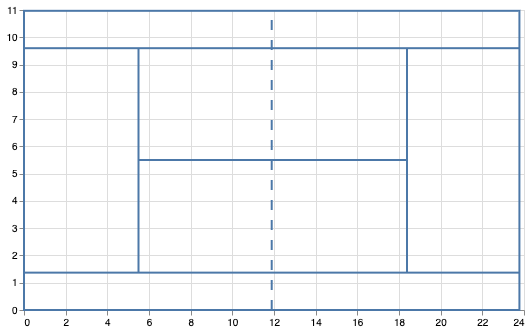

In [63]:
court = outline_plot + t_line_plot + lower_line_plot + upper_line_plot + net_line_plot
court

### Determining the location of each player

Since the location of the players during the serve is determined already by tennis rules, I will only visualize the location of the players during rallies.

In [38]:
location_data = events[['hitter', 'hitter_x', 'hitter_y']]

In [39]:
events.tail()

,rallyid,frameid,strokeid,hitter,receiver,isserve,serve,type,stroke,hitter_x,hitter_y,receiver_x,receiver_y,time
860,206,256777,1,Nadal,Djokovic,True,second,serve,forehand,3.78,-0.65,8.08,23.75,7436.00
861,206,256797,2,Djokovic,Nadal,False,first,return,backhand,7.75,23.96,4.36,0.50,7436.80
862,206,256829,3,Nadal,Djokovic,False,second,topspin,forehand,5.21,-1.27,5.04,24.29,7438.08
863,206,256857,4,Djokovic,Nadal,False,second,topspin,forehand,2.23,25.19,6.04,-3.12,7439.20
864,206,256892,5,Nadal,Djokovic,False,second,topspin,backhand,7.52,-1.69,3.26,26.24,7440.60


In [64]:
points_plot = alt.Chart(location_data).mark_point().encode(
    x = alt.X('hitter_y:Q', title = None,  scale=alt.Scale(domain=[-10, 34])),
    y = alt.Y('hitter_x:Q', title = None , scale=alt.Scale(domain=[-4, 13.97])),
    color = 'hitter'
)

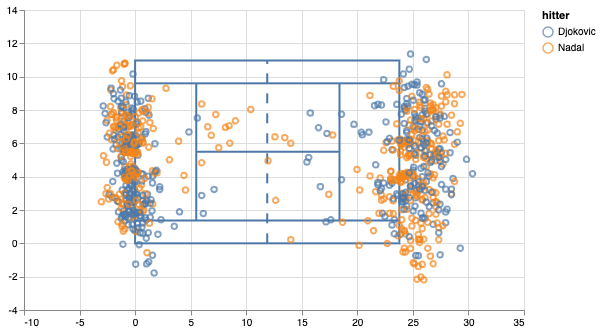

In [65]:
court + points_plot

#### A look at the location of the winners returned by won by each player

* We are aware that some of the locations of the points is incorrect, that's why I am filtering those points.

In [42]:
winner_points = points.query('reason == "winner" ')

In [56]:
winner_balls = alt.Chart(winner_points).mark_point(size = 50).encode(
    x = alt.X('y:Q', title = None,  scale=alt.Scale(domain=[-10, 34])),
    y = alt.Y('x:Q', title = None , scale=alt.Scale(domain=[-4, 13.97])),
    color = "winner"
).properties(title = "Winners Locations")

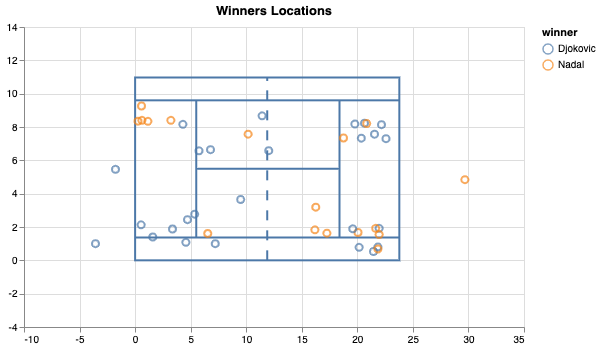

In [66]:
court + winner_balls

* Nadal winners are very close to the line compared to Djokovic winners.
* We can also see that there is an error in the recorded location of the winners.

#### A closer look for the location of the two players on wrong returns

In [45]:
out = points.query('reason == "out"')[['rallyid', 'strokes']]
out = out.rename(columns = {'strokes' : 'strokeid'}).reset_index().drop(columns = 'index')

In [46]:
full_out = pd.merge(out, events, on = ['rallyid', 'strokeid'])

In [52]:
Nadal_out = alt.Chart(full_out.query('hitter == "Nadal"')).mark_point(size = 50).encode(
    x = alt.X('hitter_y:Q', title = None,  scale=alt.Scale(domain=[-10, 34])),
    y = alt.Y('hitter_x:Q', title = None , scale=alt.Scale(domain=[-4, 13.97])),
    color = "stroke"
).properties(title = "Nadal's Faults Locations")

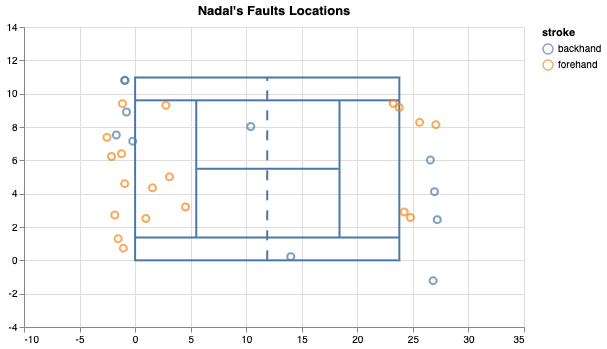

In [67]:
court + Nadal_out

In [54]:
Djokovic_out = alt.Chart(full_out.query('hitter == "Djokovic"')).mark_point(size = 50).encode(
    x = alt.X('hitter_y:Q', title = None,  scale=alt.Scale(domain=[-10, 34])),
    y = alt.Y('hitter_x:Q', title = None , scale=alt.Scale(domain=[-4, 13.97])),
    color = "stroke"
).properties(title = "Djokovic's Faults Locations")

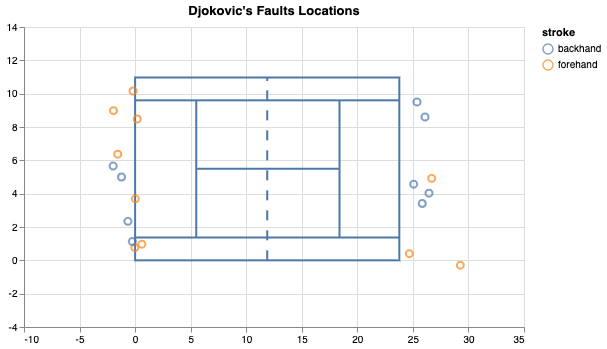

In [68]:
court + Djokovic_out

* Nadal made more faults closer to the baslines on forehand returns Compared to Djokovic who made all of his faults behind the baseline with both forhand and backhand returns.

## Conslusion 

> While we can say that the reason of Nadal's loss is his unusal defense locations in the court, we should also admit that Djokovic was able to push Nadal to make more faults from his Forehand.